### Modeling using Stats Models packages

In [1]:
#Import modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
sns.set()

In [2]:
#Import data files and process. We will be using FTSE
data_raw = pd.read_csv('Index2018.csv')
data = data_raw.copy()
data.date = pd.to_datetime(data.date, dayfirst=True)
data.set_index('date', inplace=True)
data = data.asfreq('b')
data = data.fillna(method='ffill')

In [3]:
#create lone needed column, delete others
data['market_value'] = data.ftse
del data['ftse'], data['spx'], data['dax'], data['nikkei']

#train and test split
size = int(len(data)*0.8)
train, test = data[:size], data[size:]

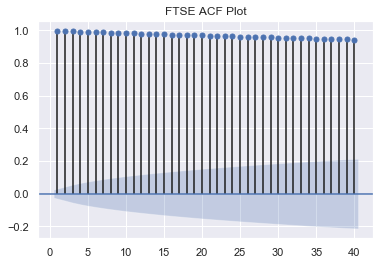

In [4]:
#correlograms
sgt.plot_acf(data.market_value, lags=40, zero=False)
plt.title('FTSE ACF Plot')
plt.show()

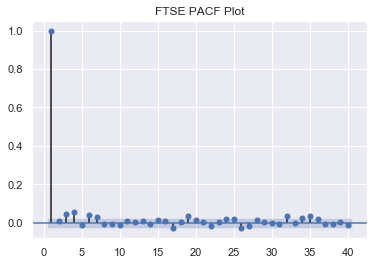

In [5]:
sgt.plot_pacf(data.market_value, lags = 40, zero=False, method='ols')
plt.title('FTSE PACF Plot')
plt.show()

### Objective:
Use statsmodels to fit AR models. Also we want to make sure we have the right number of AR components in a model we use. If we have too many, we may be **overfitting**. To make sure we are using the best possible model, we 
- create/ fit/ review a bunch of models
- we want the model with the highest Log likelihood and lowest information criteria (AIC and BIC) so
- We use the log likelihood ratio test to determine best fit model
  > Here you keep adding AR components and running the comparison test. When you reach a point where the higher order model coefficient is not significant AND LLR test p-value is also not significant, you can stop  
  > Now use the last model where p-values were significant and compare to the AR(1) to see if this still holds (note: degrees of freedom are the difference of lags between the two models. eg. if comparing AR(1) and AR(7) models, DF = 7-1 = 6


**AR1 model**

In [6]:
model_ar = ARMA(train.market_value, order=(1,0))
#order 1 = AR(1) model, 0 => no error terms in AR(1) model

In [7]:
#fit the model to find coefficients
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.601
Method:                       css-mle   S.D. of innovations             59.258
Date:                Wed, 01 Apr 2020   AIC                          55251.202
Time:                        11:55:04   BIC                          55270.766
Sample:                    01-07-1994   HQIC                         55258.058
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5080.4874    485.036     10.474      0.000    4129.834    6031.141
ar.L1.market_value     0.9985      0.001   1296.972      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

**Higher order AR model**  
We want to see how to fit higher order AR models for AR(2) ... AR(n). We will analyze each model individual and then use the log likelihood ratio test to determine whether a more complex model makes better predictions

**AR(2) Model**

In [8]:
model_ar2 = ARMA(train.market_value, order=(2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.866
Method:                       css-mle   S.D. of innovations             59.249
Date:                Wed, 01 Apr 2020   AIC                          55251.732
Time:                        11:55:06   BIC                          55277.817
Sample:                    01-07-1994   HQIC                         55260.872
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5048.1743    494.762     10.203      0.000    4078.459    6017.890
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4623           +0.0000j           58.4623            0.5000
-----------------------------------------------------------------------------
"""

**Interpretation:** Note that the p-value of AR(2) component is not significant. This suggest coef is not significantly different than 0 and we can assume it is 0. This means that the prices 2 days ago (aka AR(2) component) do not significantly affect the prices today. The prices one day ago (AR(1) component) still significantly affect the prices today though.


Now we try AR(3) and AR(4) models to see if coefficients are significantly different from zero... Also note, the more AR components you have, you might overfit the model so we will see if these are necessary to add and then use the log likelihood test to decide if the more complex models are worth using

In [9]:
model_ar3 = ARMA(train.market_value, order=(3,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.867
Method:                       css-mle   S.D. of innovations             59.178
Date:                Wed, 01 Apr 2020   AIC                          55241.733
Time:                        11:55:08   BIC                          55274.340
Sample:                    01-07-1994   HQIC                         55253.159
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5008.6404    522.419      9.587      0.000    3984.718    6032.562
ar.L1.market_value     0.9806      0.014     69.620      0.000       0.953       1.008
ar.L2.market_value    -0.0308      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1851           -4.5163j            4.5201           -0.2565
AR.3           -0.1851           +4.5163j            4.5201            0.2565
-----------------------------------------------------------------------------
"""

In [10]:
model_ar4 = ARMA(train.market_value, order=(4,0))
results_ar4 = model_ar4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Wed, 01 Apr 2020   AIC                          55217.130
Time:                        11:55:09   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    560.003      9.089      0.000    3992.055    6187.227
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

In [44]:
#Methods above dont work so doing more manually
def LLR_test(mod_1, mod_2):
    res1 = mod_1.fit()
    res2 = mod_2.fit()
    res1.summary()
    LR = 2*(res2.llf - res1.llf)
    print('P-Value for LLR:', chi2.sf(LR, 1).round(3))
    print('**Results Summary for Higher Order Model**')
    return res2.summary()

In [46]:
model_ar2 = ARMA(train.market_value, order=(2,0))
model_ar3 = ARMA(train.market_value, order=(3,0))
LLR_test(model_ar2, model_ar3)

P-Value for LLR: 0.001
**Results Summary for Higher Order Model**


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood              -27610.867
Method:                       css-mle   S.D. of innovations             59.184
Date:                Wed, 01 Apr 2020   AIC                          55231.734
Time:                        12:24:30   BIC                          55264.340
Sample:                    01-10-1994   HQIC                         55243.160
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9687    520.995      9.770      0.000    4068.838    6111.100
ar.L1.market_value     0.9806      0.014     69.611      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.467      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1851           -4.5155j            4.5193           -0.2565
AR.3           -0.1851           +4.5155j            4.5193            0.2565
-----------------------------------------------------------------------------
"""

In [47]:
model_ar3 = ARMA(train.market_value, order=(3,0))
model_ar4 = ARMA(train.market_value, order=(4,0))
LLR_test(model_ar3, model_ar4)

P-Value for LLR: 0.0
**Results Summary for Higher Order Model**


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood              -27597.562
Method:                       css-mle   S.D. of innovations             59.027
Date:                Wed, 01 Apr 2020   AIC                          55207.123
Time:                        12:24:41   BIC                          55246.250
Sample:                    01-10-1994   HQIC                         55220.834
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9695    560.826      9.076      0.000    3990.770    6189.169
ar.L1.market_value     0.9770      0.014     69.483      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.257      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.165      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9549           -2.0883j            2.2963           -0.1817
AR.3            0.9549           +2.0883j            2.2963            0.1817
AR.4           -2.6035           -0.0000j            2.6035           -0.5000
-----------------------------------------------------------------------------
"""

You will end up finding that AR(7) model > AR(8) and so you compare AR(7) and AR(1). The higher order model is better even though AR(1) was better than AR(2). In general, you will find that the higher order model is better with non-stationary data. We want to avoid this (minimize # of components) so we have to make our data stationary before modeling it

**To see if a series is stationary or not  
ADF test (unit root test):**  
Null hypothesis: Series has unit root (is non-stationary)  
If p <= 0.05 -> reject null, series is stationary  
If p > 0.05  -> fail to reject null, series is non-stationary

In [17]:
sts.adfuller(data.market_value)
#p-value = 0.4847 > 0.05 -> series is non-stationary

(-1.5977788921179858,
 0.48470912054659626,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68476.87620974617)

**Finance Minute**
We cannot rely solely on AR models with this data so we need to transform the series to make it stationary.

**In Finance:** They use returns (recall in Dr. Riddel's class we difference the series => difference between two values). Returns is the %change between two values of consecutive periods. Positive returns means % > 0, negative returns means % < 0

**For FTSE**: We will create the returns of prices before modeling the series

In [18]:
#pandas method = returns proportions so we *100 using mul method
data['returns'] = data.market_value.pct_change(1).mul(100)
data = data.iloc[1:] #remove first period diff which is NA to avoid python errors
data.head()

,market_value,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842


In [19]:
sts.adfuller(data.returns)

(-15.140761332034828,
 7.016338451093501e-28,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 19026.504469066465)

Note above, p-value < 0.05 which means series is now stationary, so we can look at ACF and PACF plots/correlograms to decide the ARMA components to include in our model

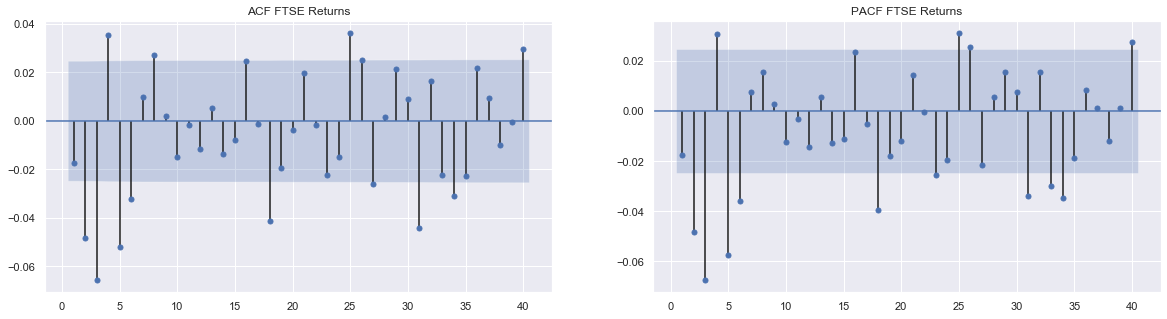

In [20]:
#ACF and PACF
def ACF_and_PACF(series, name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
    sgt.plot_acf(series, lags = 40, zero=False,ax=ax1)
    sgt.plot_pacf(series, lags = 40, zero = False, method='ols',ax=ax2)
    ax1.title.set_text('ACF ' + name + ' Returns')
    ax2.title.set_text('PACF ' + name + ' Returns')
    plt.show()
    
ACF_and_PACF(data.returns, 'FTSE')

The initial lags show significant coefficients for returns (sig different from zero) in alternating manner. That means the returns alternate increasing and decreasing every day or so. Price increases follow price decreases. This effect is not as significant in the further lags (note that the values fall within the blue zone more even though they still alternate). That means there is no autocorrelation between todays values and much further away days meaning most of the effect on prices today is captured within the last couple of days. We don't need to go too far back to capture this autocorrelation effect.


## AR Model for Returns

In [21]:
#data prep
sizer = int(len(data)*0.8)
train = data.iloc[:sizer]
test = data.iloc[sizer:]
train.head()

,market_value,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842


In [22]:
test.head()

,market_value,returns
date,,
2013-04-08,6276.94,0.434736
2013-04-09,6313.20,0.577670
2013-04-10,6387.37,1.174840
2013-04-11,6416.14,0.450420
2013-04-12,6384.39,-0.494846


In [26]:
#model specifications
model_ret_ar1 = ARMA(train.returns, order=(1,0))
results_ret_ar1 = model_ret_ar1.fit()
results_ret_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Wed, 01 Apr 2020   AIC                          15865.497
Time:                        12:00:40   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

Notice the p-values are both greater than 0.05 so this model does not have real predictive power in explaining returns today. The more easily yesterday's price is affected by higher lags (further back days' prices), the less accurate the coefficient indicating the effect becomes (the effect of the prices is not significantly different from zero, so there is really no effect). We should then see if a higher lag model serves as a better predictor.

### Higher lag Models 
Check if coefficients are better and run the LLR test to see which one is better

In [52]:
#model specifications
model_ret_ar1 = ARMA(train.returns, order=(1,0))
model_ret_ar2 = ARMA(train.returns, order=(2,0))
LLR_test(model_ret_ar1, model_ret_ar2)

P-Value for LLR: 0.0
**Results Summary for Higher Order Model**


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Wed, 01 Apr 2020   AIC                          15854.911
Time:                        12:27:05   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

**AR 2 Model** The constant is not significant, the AR 1 component is not significant, but the AR 2 one is significantly different from zero and should be included in the model. So the returns two days ago significantly impact/have some predictive power on the returns for today's prices. 

We conclude that **AR(2) > AR(1) model** because of the following checks:
- p-value is significant for LLR test
- the AR(2) component in its results summary is significant based on p-value
- the information criteria (AIC, BIC, HQIC) in AR(2) are lower than those in AR(1) model
- the log likelihood for AR(2) is higher than that in AR(1). Note for negative numbers, if it goes down that means it increased

**Now lets try comparing AR(2) to AR(3) model**

In [56]:
#LLR_test
model_ret_ar2 = ARMA(train.returns, order=(2,0))
model_ret_ar3 = ARMA(train.returns, order=(3,0))
LLR_test(model_ret_ar2, model_ret_ar3)

P-Value for LLR: 0.0
**Results Summary for Higher Order Model**


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Wed, 01 Apr 2020   AIC                          15823.477
Time:                        12:27:44   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

Even better! Log likelihood went up, information criteria went down, and now all three AR components are significant (p <= 0.05). 

Here: We keep going until the constant is significant and then find where the LLR test fails and use the model before that one which fails.
- IN DR. RIDDEL'S CLASS: We only care about the AR components being insignificant. We dont mind if the constant isnt significant because it will carry all the drift that is not accounted for in the model that we don;t want in the residual. I like this better. *See if you can find a consensus with Riddel*